YlGnBu-8
8 colors palette
    1. #ffffd9
    2. #edf8b1
    3. #c7e9b4
    4. #7fcdbb
    5. #41b6c4
    6. #1d91c0
    7. #225ea8
    8. #0c2c84

Touch frequency kiss last week
Touch frequency put arm around shoulder last week
Touch frequency intimate hug last week

How often have you and your partner touched each other in this way in the last week?


In [57]:
import textwrap
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from functools import reduce
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')


In [58]:
# Read data (output from FReDA_Touch_genVariables_final.do)
df = pd.read_csv('source/FReDA.csv')

In [59]:
# Variables to map columns
# New values could be assigned as 'in-between' values to ease plotting and calculations
overall_options = {
    'index_options': {
        '0x': 0,
        '1-5x': 1,
        '6-10x': 2,
        '11-20x': 3,
        '21-50x': 4,
        '> 50x': 5
    },
    'omo_options': {
        'Not at all': 0,
        '1 to 5 times': 1,
        '6 to 10 times': 2,
        '11 to 20 times': 3,
        '21 to 50 times': 4,
        'More than 50 times': 5
    },
    'satisfaction_options': {
        '0 - Not at all satisfied': 0,
        '1': 2,
        '2': 2,
        '3': 4,
        '4': 4,
        '5': 6,
        '6': 6,
        '7': 8,
        '8': 8,
        '9': 10,
        '10 - Completely satisfied': 10
    },
    'duration_options': {
        '0-2': 1,
        '3-5': 2,
        '6-10': 3,
        '11-20': 4,
        '21+': 5,
    },
    'kids_options': {
        '0': 0,
        '1': 1,
        '2': 2,
        '3+': 3,
    },
    'loneliness_options': {
        '1 - Not at all': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5 - Absolutely': 5
    },
    'cohabitation-options': {
        'Cohabiting': 1,
        'Separate households': 2,
    }
}

In [60]:
rename_columns = {
    'omo15i1_w2b': 'Anchor kiss frequency',
    'omo15i2_w2b': 'Anchor kiss desired',
    'pomo15i1_w2b': 'Partner kiss frequency',
    'pomo15i2_w2b': 'Partner kiss desired',
    'omo16i1_w2b': 'Anchor hold frequency',
    'omo16i2_w2b': 'Anchor hold desired',
    'pomo16i1_w2b': 'Partner hold frequency',
    'pomo16i2_w2b': 'Partner hold desired',
    'omo17i1_w2b': 'Anchor hug frequency',
    'omo17i2_w2b': 'Anchor hug desired',
    'pomo17i1_w2b': 'Partner hug frequency',
    'pomo17i2_w2b': 'Partner hug desired',
    'relsat': 'Anchor relationship satisfaction',
    'relint': 'Anchor communication quality',
    'lifsat': 'Anchor life satisfaction',
    'prelsat': 'Partner relationship satisfaction',
    'prelint': 'Partner communication quality',
    'plifsat': 'Partner life satisfaction',
    'agediff_class': 'Age difference',
    'nkidsliv_class': 'Kids',
    'sex': 'Anchor sex',
    'psex': 'Partner sex',
    'age': 'Anchor age',
    'page': 'Partner age',
    'loneliness': 'Anchor loneliness',
    'ploneliness': 'Partner loneliness',
    'cohab': 'Cohabitation',
    'confm': 'Anchor conflict management',
    'pconfm': 'Partner conflict management',
    'extr': 'Anchor extraversion',
    'agree': 'Anchor agreeableness',
    'consc': 'Anchor conscientiousness',
    'open': 'Anchor openess',
    'neur': 'Anchor neuroticism',
    'pextr': 'Partner extraversion',
    'pagree': 'Partner agreeableness',
    'pconsc': 'Partner conscientiousness',
    'popen': 'Partner openess',
    'pneur': 'Partner neuroticism',
}

# Rename some columns to ease understanding
df = df.rename(
    columns=rename_columns
)
df = df.drop([
    'reldur', 'tf_kiss', 'tf_hold', 'tf_hug', 'ptf_kiss', 'ptf_hold', 'ptf_hug'], axis=1)

"The three scales "Intimacy" [Intimität], "Apreciation" [Wertschätzung], and "Conflict" [Konflikt] were adapted from the "Network of Relationships Inventory (NRI)" (Furman & Buhrmester, 1985) and used in an abbreviated form and adapted by pairfam and Freda (Hank et al. 2024)."

(more detailed: In contrast to the original version of the NRI, the questions in this version were asked only concerning the relationship with the partner, and not to any other persons with whom the respondent has a relationship. Furthermore, to limit the volume of data collected, the individual scales have been shortened from three to two items each. The response format has five stages, as did the original, but in this version they reflect frequency (1=Never to 5=Very frequently).)

In [61]:
# Map target columns
# This will change categorical values such as '0-2' or '3-5' to numerical values: 1,2,3,etc...
df['Anchor relationship satisfaction'] = df['Anchor relationship satisfaction'].map(
    overall_options["satisfaction_options"])
df['Partner relationship satisfaction'] = df['Partner relationship satisfaction'].map(
    overall_options["satisfaction_options"])
df['Anchor life satisfaction'] = df['Anchor life satisfaction'].map(overall_options["satisfaction_options"])
df['Partner life satisfaction'] = df['Partner life satisfaction'].map(overall_options["satisfaction_options"])

df['Anchor kiss frequency'] = df['Anchor kiss frequency'].map(overall_options["omo_options"])
df['Anchor hold frequency'] = df['Anchor hold frequency'].map(overall_options["omo_options"])
df['Anchor hug frequency'] = df['Anchor hug frequency'].map(overall_options["omo_options"])
df['Anchor kiss desired'] = df['Anchor kiss desired'].map(overall_options["omo_options"])
df['Anchor hold desired'] = df['Anchor hold desired'].map(overall_options["omo_options"])
df['Anchor hug desired'] = df['Anchor hug desired'].map(overall_options["omo_options"])

df['Partner kiss frequency'] = df['Partner kiss frequency'].map(overall_options["omo_options"])
df['Partner hold frequency'] = df['Partner hold frequency'].map(overall_options["omo_options"])
df['Partner hug frequency'] = df['Partner hug frequency'].map(overall_options["omo_options"])
df['Partner kiss desired'] = df['Partner kiss desired'].map(overall_options["omo_options"])
df['Partner hold desired'] = df['Partner hold desired'].map(overall_options["omo_options"])
df['Partner hug desired'] = df['Partner hug desired'].map(overall_options["omo_options"])

df['Relationship length'] = df['reldur_class'].map(overall_options["duration_options"])
df['Kids'] = df['Kids'].map(overall_options['kids_options'])

df['Anchor loneliness'] = df['Anchor loneliness'].map(overall_options['loneliness_options'])
df['Partner loneliness'] = df['Partner loneliness'].map(overall_options['loneliness_options'])

df['Cohabitation'] = df['Cohabitation'].map(overall_options['cohabitation-options'])


In [62]:
# delete those with no relationship duration data
df = df[df['reldur_class'] != '.']
df = df.dropna(subset=["reldur_class"]).reset_index(drop=True)

In [63]:
df = df.drop(['reldur_class'], axis=1)

In [64]:
# Group anchor and partner by age
for i in range(0, len(df)):
    if df['Anchor age'][i] <= 20:
        df.loc[i, 'Anchor age group'] = 1
    elif 20 < df['Anchor age'][i] <= 30:
        df.loc[i, 'Anchor age group'] = 2
    elif 30 < df['Anchor age'][i] <= 40:
        df.loc[i, 'Anchor age group'] = 3
    elif 40 < df['Anchor age'][i] <= 50:
        df.loc[i, 'Anchor age group'] = 4
    elif 50 < df['Anchor age'][i]:
        df.loc[i, 'Anchor age group'] = 5

for i in range(0, len(df)):
    if df['Partner age'][i] <= 20:
        df.loc[i, 'Partner age group'] = 1
    elif 20 < df['Partner age'][i] <= 30:
        df.loc[i, 'Partner age group'] = 2
    elif 30 < df['Partner age'][i] <= 40:
        df.loc[i, 'Partner age group'] = 3
    elif 40 < df['Partner age'][i] <= 50:
        df.loc[i, 'Partner age group'] = 4
    elif 50 < df['Partner age'][i]:
        df.loc[i, 'Partner age group'] = 5


Compare Anchor and Partner. 
Find if there is any discrepancy between the reported frequency (kiss, pat, hug)
1. Anchor reported - Anchor desire
2. Partner reported - Partner desire

In [65]:
for i in range(0, len(df)):
    df.loc[i, 'Anchor Frequency'] = np.mean(
        [df['Anchor kiss frequency'][i], df['Anchor hold frequency'][i], df['Anchor hug frequency'][i]])
    df.loc[i, 'Partner Frequency'] = np.mean(
        [df['Partner kiss frequency'][i], df['Partner hold frequency'][i], df['Partner hug frequency'][i]])

    df.loc[i, 'Anchor Desired'] = np.mean(
        [df['Anchor kiss desired'][i], df['Anchor hold desired'][i], df['Anchor hug desired'][i]])
    df.loc[i, 'Partner Desired'] = np.mean(
        [df['Partner kiss desired'][i], df['Partner hold desired'][i], df['Partner hug desired'][i]])

    df.loc[i, 'Anchor kiss diff'] = df['Anchor kiss frequency'][i] - df['Anchor kiss desired'][i]
    df.loc[i, 'Anchor hold diff'] = df['Anchor hold frequency'][i] - df['Anchor hold desired'][i]
    df.loc[i, 'Anchor hug diff'] = df['Anchor hug frequency'][i] - df['Anchor hug desired'][i]

    df.loc[i, 'Partner kiss diff'] = df['Partner kiss frequency'][i] - df['Partner kiss desired'][i]
    df.loc[i, 'Partner hold diff'] = df['Partner hold frequency'][i] - df['Partner hold desired'][i]
    df.loc[i, 'Partner hug diff'] = df['Partner hug frequency'][i] - df['Partner hug desired'][i]

In [66]:
for i in range(0, len(df)):
    df.loc[i, 'Anchor Difference'] = np.mean(
        [df['Anchor kiss diff'][i], df['Anchor hold diff'][i], df['Anchor hug diff'][i]])
    df.loc[i, 'Partner Difference'] = np.mean(
        [df['Partner kiss diff'][i], df['Partner hold diff'][i], df['Partner hug diff'][i]])

Start with some descriptive statistics, including a Correlation Matrix

In [67]:
individual_factors = [
    # 'Anchor sex',
    'Anchor age',
    'Anchor life satisfaction',
    'Anchor loneliness',
    'Anchor extraversion',
    'Anchor agreeableness',
    'Anchor conscientiousness',
    'Anchor openess',
    'Anchor neuroticism',

    # 'Partner sex',
    'Partner age',
    'Partner life satisfaction',
    'Partner loneliness',
    'Partner extraversion',
    'Partner agreeableness',
    'Partner conscientiousness',
    'Partner neuroticism',
]

relationship_factors = [
    'Anchor Frequency',
    'Anchor Desired',
    'Anchor Difference',
    'Anchor relationship satisfaction',
    'Anchor communication quality',
    'Anchor conflict management',
    'Partner Frequency',
    'Partner Desired',
    'Partner Difference',
    'Partner relationship satisfaction',
    'Partner communication quality',
    'Partner conflict management',
    # 'Age difference',
    'Kids',
    'Cohabitation',
]


In [68]:
# https://tosinharold.medium.com/enhancing-correlation-matrix-heatmap-plots-with-p-values-in-python-41bac6a7fd77

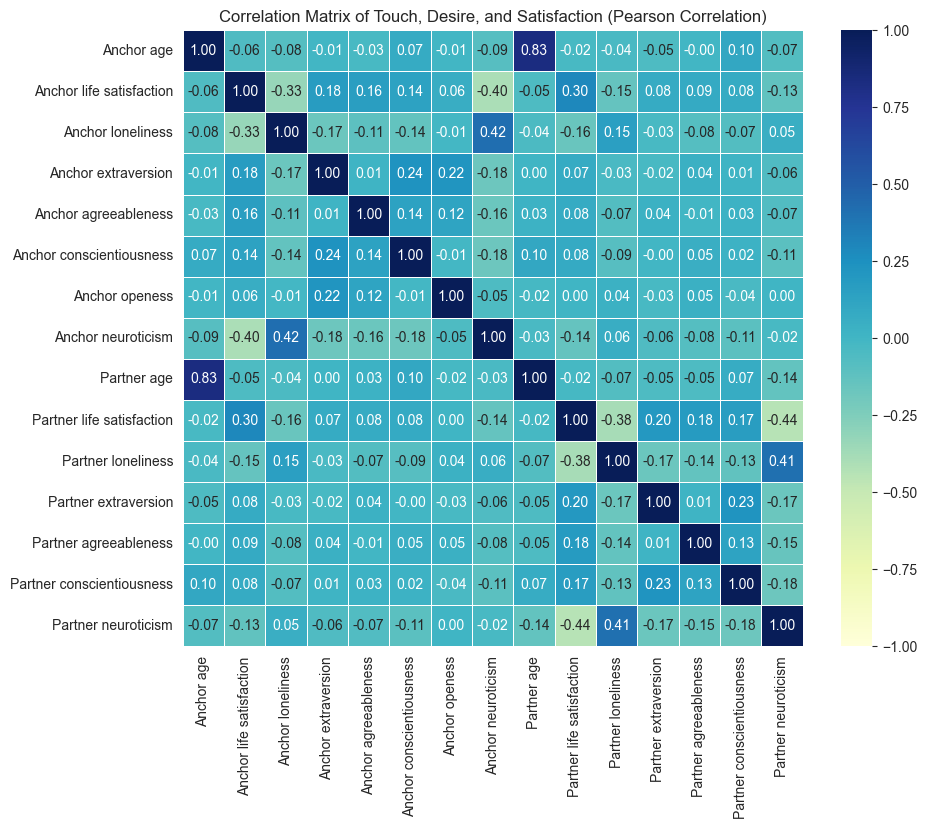

In [69]:
correlation = df[
    individual_factors
].corr()

matrix = np.triu(correlation)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, vmax=1, vmin=-1)
plt.title('Correlation Matrix of Touch, Desire, and Satisfaction (Pearson Correlation)')
plt.grid(False)

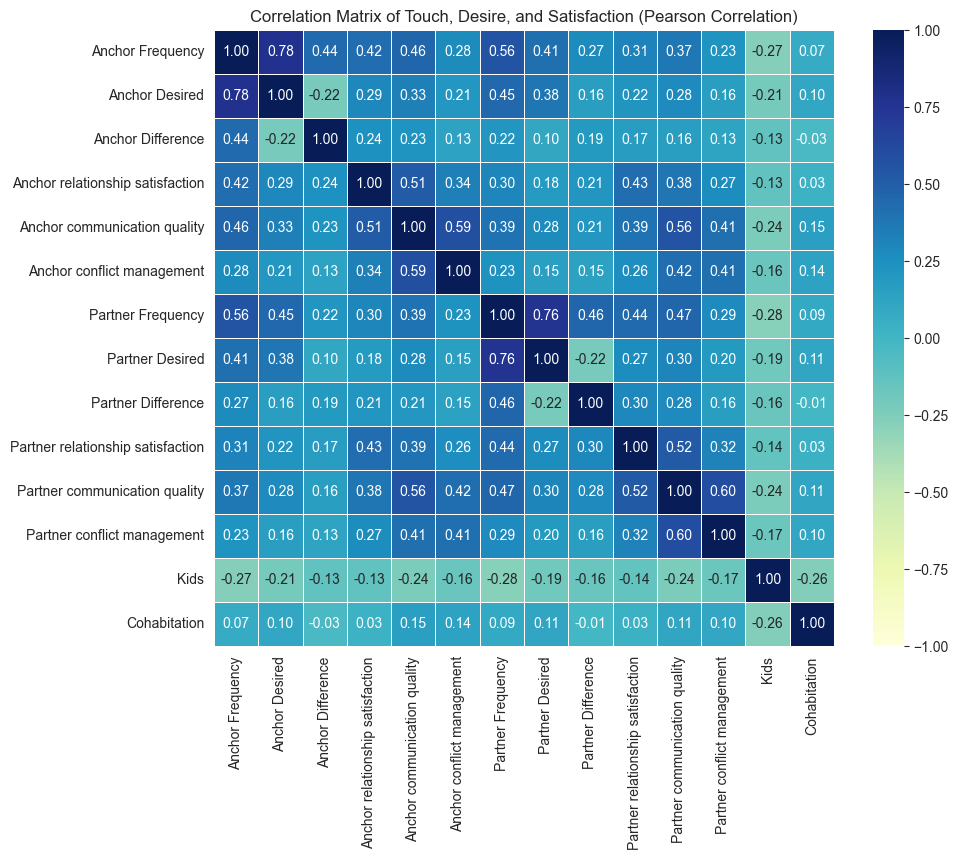

In [70]:
correlation = df[
    relationship_factors
].corr()

matrix = np.triu(correlation)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, vmax=1, vmin=-1)
plt.title('Correlation Matrix of Touch, Desire, and Satisfaction (Pearson Correlation)')
plt.grid(False)

In [146]:
colors = ["#edf8b1", "#c7e9b4", "#7fcdbb", "#41b6c4", "#1d91c0", "#225ea8"]

In [147]:
def calculate_freq(input_var):
    n = df[input_var].count()
    m = [
        np.sum(df[input_var] < 1),
        np.sum((df[input_var] >= 1) & (df[input_var] < 2)),
        np.sum((df[input_var] >= 2) & (df[input_var] < 3)),
        np.sum((df[input_var] >= 3) & (df[input_var] < 4)),
        np.sum((df[input_var] >= 4) & (df[input_var] < 5)),
        np.sum(df[input_var] >= 5)
    ]

    temp_df = pd.DataFrame({
        input_var: [round((m[0] * 100) / n, 2),
                    round((m[1] * 100) / n, 2),
                    round((m[2] * 100) / n, 2),
                    round((m[3] * 100) / n, 2),
                    round((m[4] * 100) / n, 2),
                    round((m[5] * 100) / n, 2)]
    },
        index=["Not at all",
               "1 to 5",
               "6 to 10",
               "11 to 20",
               "21 to 50",
               "> 50"])

    return temp_df


vars = ['Anchor touch index frequency',
        'Anchor touch index desired',
        'Partner touch index frequency',
        'Partner touch index desired',
        'Anchor kiss frequency',
        'Anchor kiss desired',
        'Partner kiss frequency',
        'Partner kiss desired',
        'Anchor hold frequency',
        'Anchor hold desired',
        'Partner hold frequency',
        'Partner hold desired',
        'Anchor hug frequency',
        'Anchor hug desired',
        'Partner hug frequency',
        'Partner hug desired',
        ]

labels = ["Not at all",
          "1 to 5",
          "6 to 10",
          "11 to 20",
          "21 to 50",
          "> 50", ]
frequency_map = pd.DataFrame({}, index=labels)

for i, label in enumerate(vars):
    a = calculate_freq(label)
    frequency_map = pd.concat([frequency_map, a], axis=1)



In [148]:
fig_names = ['Anchor overall touch', 'Partner overall touch',
             'Anchor kiss touch', 'Partner kiss touch',
             'Anchor hold touch', 'Partner hold touch',
             'Anchor hug touch', 'Partner hug touch'
             ]

lines_w = 3

for i, name in enumerate(fig_names):
    ax = None
    ax1 = None

    ax = sns.barplot(frequency_map[vars[i]],
                     linewidth=lines_w,
                     edgecolor=colors,
                     facecolor=(0, 0, 0, 0)
                     )
    for bar in ax.patches:
        bar.set_linestyle('--')
        bar.set_linewidth(lines_w)

    ax1 = sns.barplot(frequency_map[vars[i + 1]],
                      linewidth=lines_w,
                      edgecolor=colors,
                      facecolor=(0, 0, 0, 0)
                      )

    multiplier = 0

    for attribute, measurement in frequency_map[vars[i]].items():
        offset = multiplier
        rects = ax.bar(offset,
                       measurement,
                       label=attribute,
                       edgecolor=colors[multiplier],
                       facecolor=(0, 0, 0, 0)
                       )
        ax.bar_label(rects)
        multiplier += 1

    multiplier = 0

    for attribute, measurement in frequency_map[vars[i + 1]].items():
        offset = multiplier
        rects = ax1.bar(offset,
                        measurement,
                        label=attribute,
                        edgecolor=colors[multiplier],
                        facecolor=(0, 0, 0, 0))
        ax1.bar_label(rects)
        multiplier += 1

    plt.grid(False)
    plt.tight_layout()
    plt.ylabel("Percentage")
    plt.ylim(0, 40)
    plt.xticks(range(6), labels=labels, rotation=25)
    plt.savefig('output/img/frequency/' + name + '.png', dpi=350, transparent=True, bbox_inches='tight')
    plt.close()

In [154]:
# Calculate means for touch variables
df_touch = df[[
    'Anchor age', 'Partner age', 'Relationship length', 'Anchor kiss frequency',
    'Anchor hold frequency', 'Anchor hug frequency', 'Anchor kiss desired', 'Anchor hold desired',
    'Anchor hug desired', 'Partner kiss frequency', 'Partner hold frequency', 'Partner hug frequency',
    'Partner kiss desired', 'Partner hold desired', 'Partner hug desired', 'age-group (Anchor)',
    'age-group (Partner)', 'Anchor touch index frequency', 'Anchor touch index desired',
    'Partner touch index frequency', 'Partner touch index desired', 'Anchor relationship satisfaction',
    'Partner relationship satisfaction'
]]

In [155]:
sns.set_theme(style='white')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

2.0_Anchor touch index (E) vs. 2.0_Anchor touch index (D): Mann-Whitney-Wilcoxon test two-sided, P_val:6.976e-07 U_stat=4.945e+05
1.0_Anchor touch index (E) vs. 1.0_Anchor touch index (D): Mann-Whitney-Wilcoxon test two-sided, P_val:3.109e-03 U_stat=2.482e+05
3.0_Anchor touch index (E) vs. 3.0_Anchor touch index (D): Mann-Whitney-Wilcoxon test two-sided, P_val:2.981e-16 U_stat=1.331e+06
4.0_Anchor touch index (E) vs. 4.0_Anchor touch index (D): Mann-Whitney-Wilcoxon test two-sided, P_val:8.971e-35 U_stat=2.024e+06
5.0_Anchor touch index (E) vs. 5.0_Anchor touch index (D): Mann-Whitney-Wilcoxon test two-sided, P_val:5.676e-12 U_stat=4.189e+05


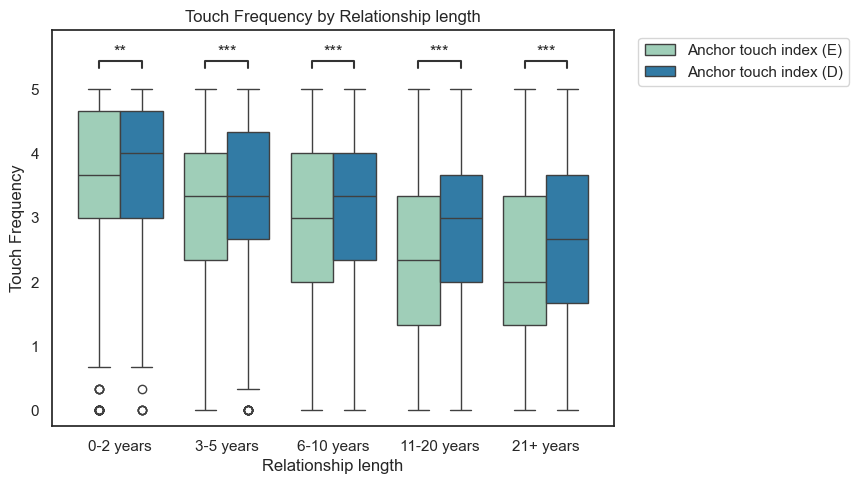

In [187]:
touching = df_touch.melt(id_vars='Relationship length',
                         value_vars=['Anchor touch index frequency', 'Anchor touch index desired',
                                     'Partner touch index frequency',
                                     'Partner touch index desired'],
                         var_name='Touch index', value_name='Touch Freq'
                         )

x = "Relationship length"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor touch index frequency', 'Anchor touch index desired']
pairs = [
    ((1, "Anchor touch index frequency"), (1, "Anchor touch index desired")),
    ((2, "Anchor touch index frequency"), (2, "Anchor touch index desired")),
    ((3, "Anchor touch index frequency"), (3, "Anchor touch index desired")),
    ((4, "Anchor touch index frequency"), (4, "Anchor touch index desired")),
    ((5, "Anchor touch index frequency"), (5, "Anchor touch index desired")),
]
ax = sns.boxplot(data=touching, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', )
annot = Annotator(ax, pairs, data=touching, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

#TODO:format p-value


annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["0-2 years", "3-5 years", "6-10 years", "11-20 years", "21+ years"])
plt.ylabel("Touch Frequency")
plt.title("Touch Frequency by Relationship length")
plt.savefig("output/img/touch_x_relen.png", dpi=350, transparent=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

2_Anchor touch index (E) vs. 2_Anchor touch index (D): t-test independent samples, P_val:4.132e-12 t=-6.959e+00
1_Anchor touch index (E) vs. 1_Anchor touch index (D): t-test independent samples, P_val:2.027e-02 t=-2.338e+00
3_Anchor touch index (E) vs. 3_Anchor touch index (D): t-test independent samples, P_val:7.213e-33 t=-1.201e+01
5_Anchor touch index (E) vs. 5_Anchor touch index (D): t-test independent samples, P_val:7.741e-04 t=-3.386e+00
4_Anchor touch index (E) vs. 4_Anchor touch index (D): t-test independent samples, P_val:6.975e-20 t=-9.177e+00
1_Anchor touch index (E) vs. 5_Anchor touch index (E): t-test independent samples, P_val:6.479e-11 t=6.753e+00
1_Anchor touch index (D) vs. 5_Anchor touch index (D): t-test independent samples, P_val:1.988e-11 t=6.960e+00


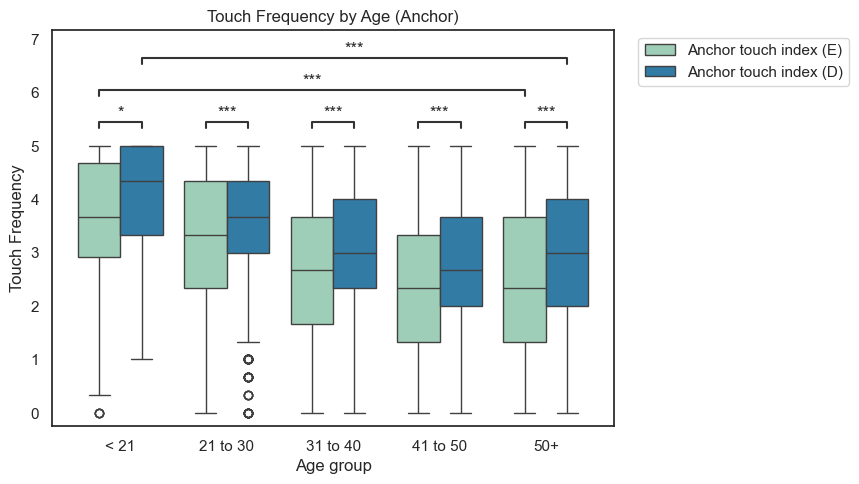

In [188]:
touching = df_touch.melt(id_vars='age-group (Anchor)',
                         value_vars=['Anchor touch index frequency', 'Anchor touch index desired',
                                     'Partner touch index frequency',
                                     'Partner touch index desired'],
                         var_name='Touch index', value_name='Touch Freq'
                         )

x = "age-group (Anchor)"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor touch index frequency', 'Anchor touch index desired']
pairs = [
    ((1, "Anchor touch index frequency"), (1, "Anchor touch index desired")),
    ((5, "Anchor touch index frequency"), (5, "Anchor touch index desired")),
    ((1, "Anchor touch index frequency"), (5, "Anchor touch index frequency")),
    ((1, "Anchor touch index desired"), (5, "Anchor touch index desired")),
    ((2, "Anchor touch index desired"), (2, "Anchor touch index frequency")),
    ((4, "Anchor touch index frequency"), (4, "Anchor touch index desired")),
    ((3, "Anchor touch index frequency"), (3, "Anchor touch index desired")),
]
ax = sns.boxplot(data=touching, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', )
annot = Annotator(ax, pairs, data=touching, x=x, y=y, hue=hue, hue_order=hue_order)
annot.configure(test='t-test_ind', verbose=2, pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])
annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["< 21", "21 to 30", "31 to 40", "41 to 50", "50+"])
plt.ylabel("Touch Frequency")
plt.xlabel("Age group")
plt.title("Touch Frequency by Age (Anchor)")
plt.savefig("output/img/touch_x_age.png", dpi=350, transparent=True)




p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.0_Anchor touch index (E) vs. 2.0_Anchor touch index (D): t-test independent samples, P_val:2.902e-02 t=-2.230e+00
10.0_Anchor touch index (E) vs. 10.0_Anchor touch index (D): t-test independent samples, P_val:8.941e-12 t=-6.834e+00
2.0_Anchor touch index (E) vs. 10.0_Anchor touch index (E): t-test independent samples, P_val:8.738e-36 t=-1.262e+01
2.0_Anchor touch index (D) vs. 10.0_Anchor touch index (D): t-test independent samples, P_val:2.850e-27 t=-1.091e+01


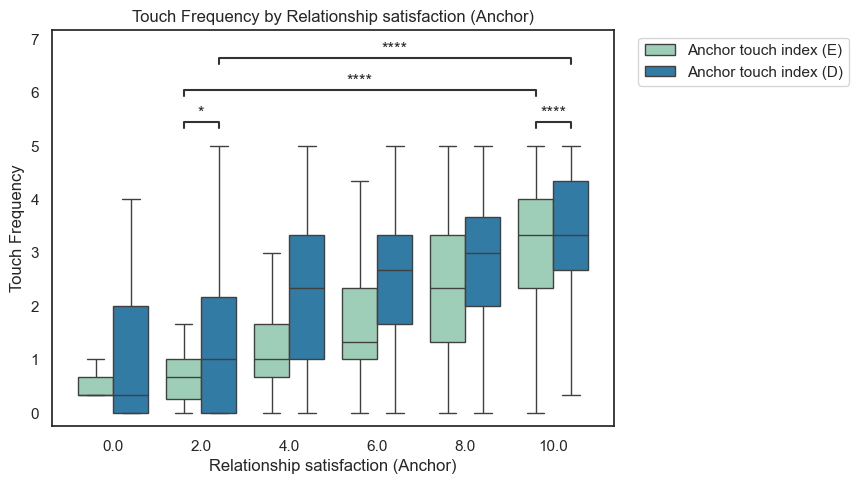

In [158]:
touching = df_touch.melt(id_vars='Anchor relationship satisfaction',
                         value_vars=['Anchor touch index frequency', 'Anchor touch index desired',
                                     'Partner touch index frequency',
                                     'Partner touch index desired'],
                         var_name='Touch index', value_name='Touch Freq'
                         )

x = "Anchor relationship satisfaction"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor touch index frequency', 'Anchor touch index desired']
pairs = [
    ((2, "Anchor touch index frequency"), (2, "Anchor touch index desired")),
    ((10, "Anchor touch index frequency"), (10, "Anchor touch index desired")),
    ((2, "Anchor touch index frequency"), (10, "Anchor touch index frequency")),
    ((2, "Anchor touch index desired"), (10, "Anchor touch index desired"))
]
ax = sns.boxplot(data=touching, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=touching, x=x, y=y, hue=hue, hue_order=hue_order)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.ylabel("Touch Frequency")
plt.xlabel("Relationship satisfaction (Anchor)")
plt.title("Touch Frequency by Relationship satisfaction (Anchor)")
plt.savefig("output/img/touch_x_resat.png", dpi=350, transparent=True)
# plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["< 21", "21 to 30", "31 to 40", "41 to 50", "50+"])

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1.0_Anchor touch discrepancy vs. 1.0_Partner touch discrepancy: t-test independent samples, P_val:6.213e-01 t=-4.941e-01
5.0_Anchor touch discrepancy vs. 5.0_Partner touch discrepancy: t-test independent samples, P_val:1.003e-02 t=2.577e+00
1.0_Anchor touch discrepancy vs. 5.0_Anchor touch discrepancy: t-test independent samples, P_val:6.941e-05 t=3.988e+00
1.0_Partner touch discrepancy vs. 5.0_Partner touch discrepancy: t-test independent samples, P_val:6.544e-12 t=6.915e+00


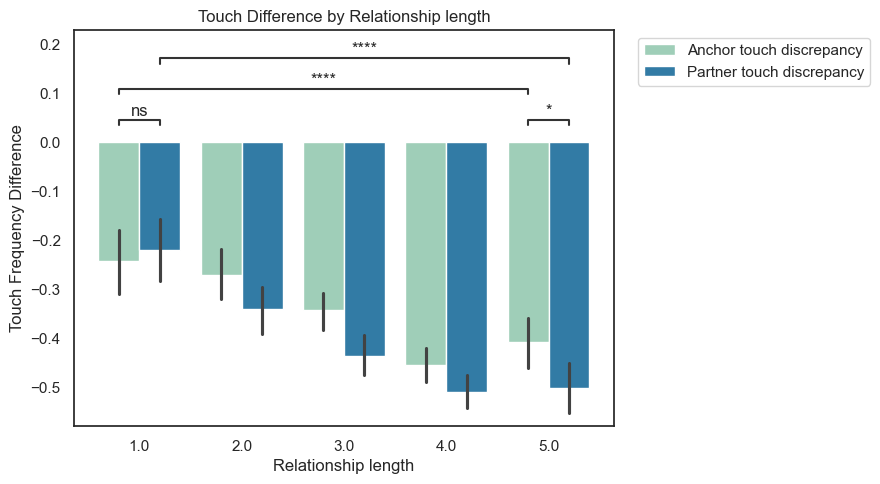

In [159]:
discrepancy = df.melt(id_vars='Relationship length',
                      value_vars=['Anchor touch discrepancy', 'Partner touch discrepancy'],
                      var_name='Touch index', value_name='Touch Freq'
                      )
x = "Relationship length"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor touch discrepancy', 'Partner touch discrepancy']
pairs = [
    ((1, "Anchor touch discrepancy"), (1, "Partner touch discrepancy")),
    ((5, "Anchor touch discrepancy"), (5, "Partner touch discrepancy")),
    ((1, "Anchor touch discrepancy"), (5, "Anchor touch discrepancy")),
    ((1, "Partner touch discrepancy"), (5, "Partner touch discrepancy")),
]

ax = sns.barplot(data=discrepancy,
                 x=x,
                 y=y,
                 hue=hue,
                 palette='YlGnBu',
                 # style=hue,
                 # markers=True
                 )

annot = Annotator(ax, pairs, data=discrepancy, x=x, y=y, hue=hue, hue_order=hue_order)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.ylabel("Touch Frequency Difference")
plt.xlabel("Relationship length")
plt.title("Touch Difference by Relationship length")
plt.grid(False)
plt.savefig("output/img/touch_diff_relen.png", dpi=350, transparent=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2.0_Anchor touch discrepancy vs. 2.0_Partner touch discrepancy: t-test independent samples, P_val:4.325e-01 t=7.896e-01
10.0_Anchor touch discrepancy vs. 10.0_Partner touch discrepancy: t-test independent samples, P_val:3.348e-05 t=4.151e+00
2.0_Anchor touch discrepancy vs. 10.0_Anchor touch discrepancy: t-test independent samples, P_val:4.668e-04 t=-3.502e+00
2.0_Partner touch discrepancy vs. 10.0_Partner touch discrepancy: t-test independent samples, P_val:2.035e-06 t=-4.758e+00


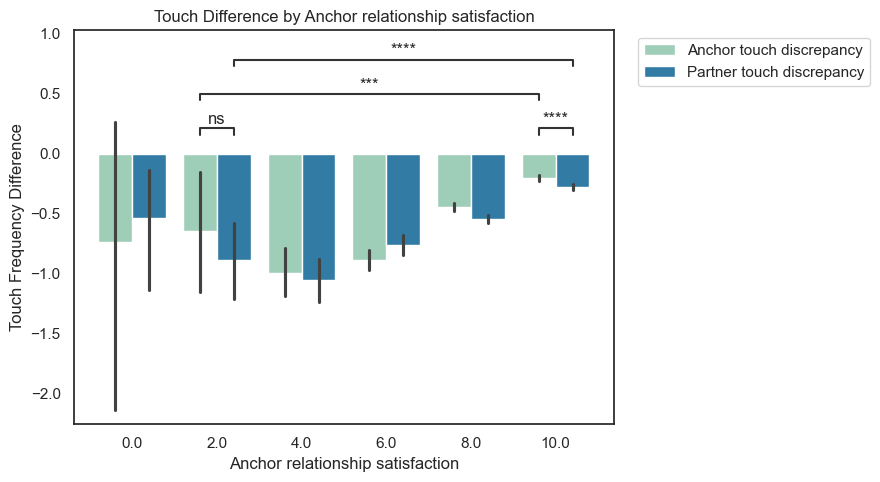

In [163]:
discrepancy = df.melt(id_vars='Anchor relationship satisfaction',
                      value_vars=['Anchor touch discrepancy', 'Partner touch discrepancy'],
                      var_name='Touch index', value_name='Touch Freq'
                      )
x = "Anchor relationship satisfaction"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor touch discrepancy', 'Partner touch discrepancy']
pairs = [
    ((2, "Anchor touch discrepancy"), (2, "Partner touch discrepancy")),
    ((10, "Anchor touch discrepancy"), (10, "Partner touch discrepancy")),
    ((2, "Anchor touch discrepancy"), (10, "Anchor touch discrepancy")),
    ((2, "Partner touch discrepancy"), (10, "Partner touch discrepancy")),
]

ax = sns.barplot(data=discrepancy,
                 x=x,
                 y=y,
                 hue=hue,
                 palette='YlGnBu',
                 # style=hue,
                 # markers=True
                 )

annot = Annotator(ax, pairs, data=discrepancy, x=x, y=y, hue=hue, hue_order=hue_order)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.ylabel("Touch Frequency Difference")
plt.xlabel("Anchor relationship satisfaction")
plt.title("Touch Difference by Anchor relationship satisfaction")

plt.grid(False)

#TODO: Calcualte overall relationship satisfaction
# plt.savefig("output/img/touch_diff_relen.png", dpi=350, transparent=True)

Following "User's guide to correlation coefficients" (https://pmc.ncbi.nlm.nih.gov/articles/PMC6107969/)

1. There is a Strong correlation between touch experienced and touch desired for both Anchor (0.82) and Partner (0.81)
2. There is a Moderate correlation for communication quality between anchor and partner (0,56)
3. There is a Moderate correlation for experienced touch between anchor and partner (0.54)
4. There is a Moderate correlation between partner relationship satisfaction and communication quality (0,46)
5. There is a Moderate correlation between partner experienced touch and anchor desired touch (0,45)
6. There is a Moderate correlation between anchor experienced touch and partner desired touch (0,43)
7. There is a Moderate correlation between touch experienced and perceived communication quality within the relationship for the anchor (0.43)
8. There is a Moderate correlation between anchor desired touch and partner desired touch (0,40)

From Yvonee

Key predictors of higher touch frequency were
1. higher relationship satisfaction
2. more positive communication
3. shorter relationship duration
4. the absence of children
5. living together
6. younger age